In [18]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

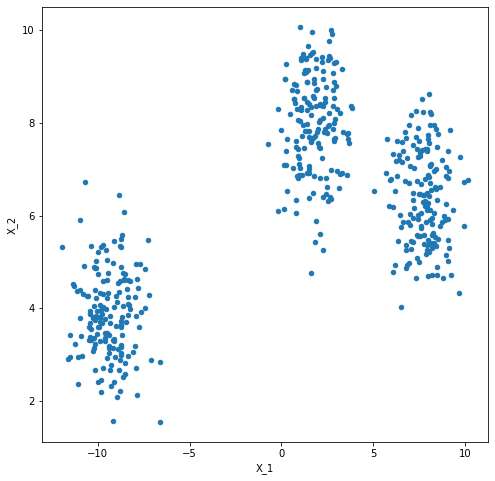

In [25]:
X_train, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [20]:
# To get centroid coordinates
def centroidCDs(k,X):
    arr=[]
    for i in range(k):
        x1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        y1 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([x1, y1])
    return np.asarray(arr)

In [21]:
def Euclid(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [22]:
# To assign every element od the cluster with a centroid 
def assignCentroids(k, X, centroids):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        distances = []
        for j in range(k):
            distances.append(Euclid(X[i], centroids[j]))
#       returns the centroid with the shortest distance with the element
        shortestdisIndex = np.argmin(distances)
        cluster[i] = shortestdisIndex
    return np.asarray(cluster)    

In [23]:
def betterCentroids(k, X, cluster):
    centroidArray = []
    for j in range(k):
        arr = []
#         finding a more precise centroid w.r.t present elements of the k-Class
        for i in range(len(X)):
            if cluster[i]==j:
                arr.append(X[i])
        centroidArray.append(np.mean(arr, axis=0)) 
    return np.asarray(centroidArray)

In [24]:
# The terminal condition of minimum possible distance to end the loop
def difference(oldCentroid, newCentroid):
    res = 0
    for a,b in zip(oldCentroid,newCentroid):
        res+=Euclid(a,b)
    return res

In [36]:
def showClusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'orange', 1:'brown', 2:'blue'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

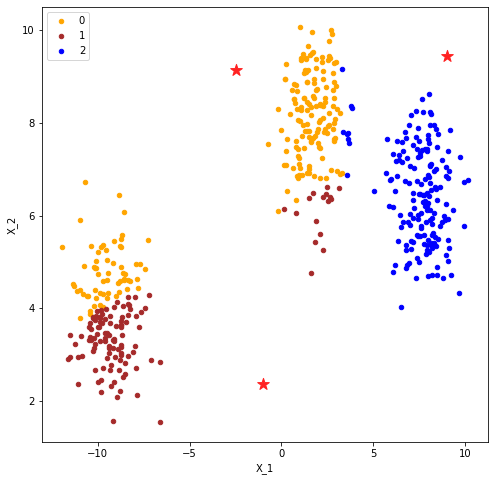

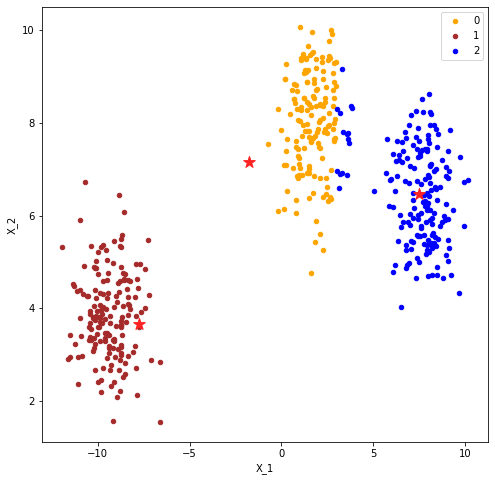

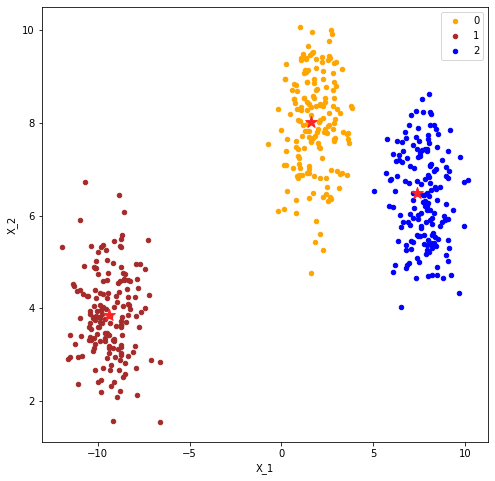

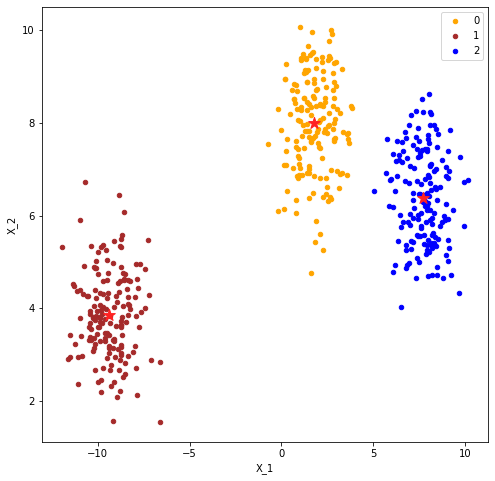

In [37]:
def k_means(k, X):
    oldCentroid = centroidCDs(k, X)
    cluster = [0]*len(X)
    centroidsDiff = 100

    while centroidsDiff>.001:
        cluster = assignCentroid(k, X, oldCentroid)
        showClusters(X, cluster, oldCentroid)
        newCentroid = betterCentroids(k, X, cluster)
        centroidsDiff = difference(oldCentroid, newCentroid)
        oldCentroid = newCentroid
    return cluster

cluster = k_means(3, X_train)